In [1]:
import json
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
from numpy import median
import matplotlib.pyplot as plt
import warnings

,budget,id,popularity,revenue,runtime,vote_average,vote_count
budget,1,-0.0893767,0.505414,0.730823,0.269851,0.0931457,0.59318
id,-0.0893767,1,0.031202,-0.0504255,-0.153536,-0.270595,-0.00412844
popularity,0.505414,0.031202,1,0.644724,0.225502,0.273952,0.77813
revenue,0.730823,-0.0504255,0.644724,1,0.251093,0.19715,0.781487
runtime,0.269851,-0.153536,0.225502,0.251093,1,0.375046,0.271944
vote_average,0.0931457,-0.270595,0.273952,0.19715,0.375046,1,0.312997
vote_count,0.59318,-0.00412844,0.77813,0.781487,0.271944,0.312997,1


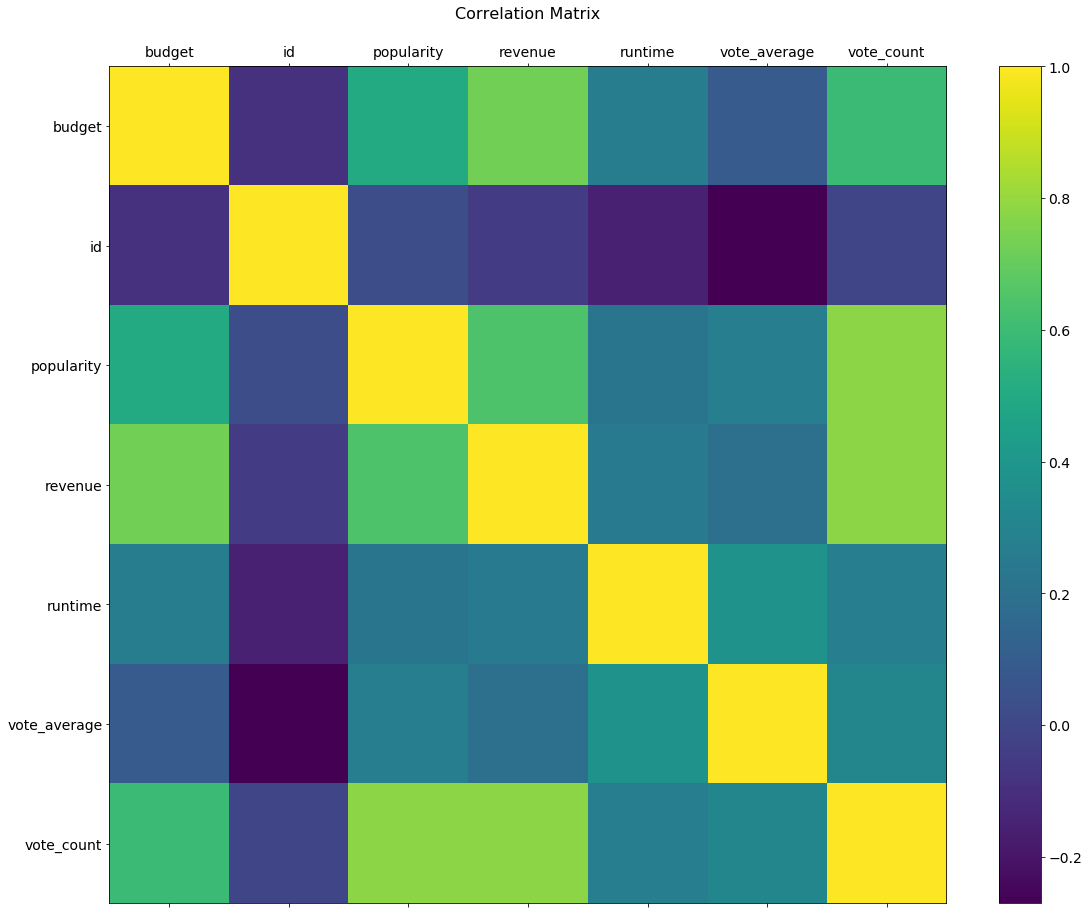

In [35]:
#loads the movie dataset with release date
def load_tmdb_movies(path):
    file = pd.read_csv(path)
    file['release_date'] = pd.to_datetime(file['release_date']).apply(lambda x: x.date()) #convert to date time for us
    json_columns = ['genres', 'keywords', 'production_countries', 'production_companies', 'spoken_languages'] #these are json cols
    for column in json_columns:
        file[column] = file[column].apply(json.loads)
    return file

movies = load_tmdb_movies("./tmdb-movie-metadata/tmdb_5000_movies.csv")
movies.head()

cols = [x for x in movies.columns if type(movies[x][0]) == np.int64 or type(movies[x][0]) == np.float64]
f = plt.figure(figsize=(19, 15))
plt.matshow(movies.corr(), fignum=f.number)
plt.xticks(range(len(cols)), cols, fontsize=14)
plt.yticks(range(len(cols)), cols, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

corr = movies.corr()
corr.style.background_gradient(cmap='coolwarm')

In [3]:
def load_tmdb_credits(path):
    file = pd.read_csv(path)
    json_columns = ['cast', 'crew']
    for column in json_columns:
        file[column] = file[column].apply(json.loads)
    return file

print(load_tmdb_credits("./tmdb-movie-metadata/tmdb_5000_credits.csv"))

      movie_id                                        title  \
0        19995                                       Avatar   
1          285     Pirates of the Caribbean: At World's End   
2       206647                                      Spectre   
3        49026                        The Dark Knight Rises   
4        49529                                  John Carter   
5          559                                 Spider-Man 3   
6        38757                                      Tangled   
7        99861                      Avengers: Age of Ultron   
8          767       Harry Potter and the Half-Blood Prince   
9       209112           Batman v Superman: Dawn of Justice   
10        1452                             Superman Returns   
11       10764                            Quantum of Solace   
12          58   Pirates of the Caribbean: Dead Man's Chest   
13       57201                              The Lone Ranger   
14       49521                                 Man of S